In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import os

In [3]:
names_dir = r'C:\Users\BNP12\Documents\Python Files\Intro to Data Science\namesbystate'
names_list_data = []
names_cols = ['State', 'Gender', 'Year', 'Name', 'Count']
for file in os.listdir(names_dir):
    if file.endswith('.TXT'):
        names_data = pd.read_csv(names_dir + '\\' + file, sep=',', header=None, names=names_cols)
        names_list_data.append(names_data)
    else:
        continue
names_data = pd.concat(names_list_data)

In [4]:
names_data.head()

,State,Gender,Year,Name,Count
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7


In [5]:
names_data[names_data['Count']==names_data['Count'].max()] # Most common baby name

,State,Gender,Year,Name,Count
199633,NY,M,1947,Robert,10026


In [6]:
names_data['Gender'].value_counts() # Number of baby names by gender

F    3510324
M    2801180
Name: Gender, dtype: int64

In [7]:
names_data['State'].value_counts().head(5) # Top 5 baby names by State

CA    400762
TX    368987
NY    309532
IL    237839
FL    218192
Name: State, dtype: int64

In [8]:
names_data.tail()

,State,Gender,Year,Name,Count
28746,WY,M,2021,Santiago,5
28747,WY,M,2021,Spencer,5
28748,WY,M,2021,Tate,5
28749,WY,M,2021,Timothy,5
28750,WY,M,2021,Tucker,5


In [9]:
data = names_data[names_data['Year']>=1950]
data.shape

(4898774, 5)

In [10]:
# each year -> get me total babies names count by sex(gender)
data.groupby(['Year', 'Gender']).sum()['Count']

Year  Gender
1950  F         1610015
      M         1720243
1951  F         1695503
      M         1811528
1952  F         1745309
                 ...   
2019  M         1545678
2020  F         1303090
      M         1478890
2021  F         1320095
      M         1492780
Name: Count, Length: 144, dtype: int64

In [11]:
data.groupby('Gender')['Count'].sum()/data['Count'].sum()

Gender
F    0.470011
M    0.529989
Name: Count, dtype: float64

In [12]:
total_babies = data['Count'].sum()
female_percent = data[data['Gender']=='F'].Count.sum()/data['Count'].sum()
male_percent = data[data['Gender']=='M'].Count.sum()/data['Count'].sum()

In [13]:
most_popular_names = (data.groupby(['Name', 'Gender'])
                      .Count
                      .sum()
                      .reset_index()
                      .sort_values('Count', ascending=False))

In [14]:
most_popular_names.head(20)

,Name,Gender,Count
21483,Michael,M,3918662
13220,James,M,2902195
7440,David,M,2899746
14681,John,M,2755438
25319,Robert,M,2583575
30987,William,M,2141116
6137,Christopher,M,2023532
14927,Joseph,M,1714987
7131,Daniel,M,1704286
20916,Matthew,M,1592315


In [15]:
unique_names_per_gender = (
data
    .groupby(['Year', 'Gender'])
    .Name
    .nunique()
    .unstack()
)

In [16]:
unique_names_per_gender.head()

Gender,F,M
Year,,
1950,2112,1721
1951,2173,1735
1952,2210,1763
1953,2269,1757
1954,2300,1755


<AxesSubplot:xlabel='Year'>

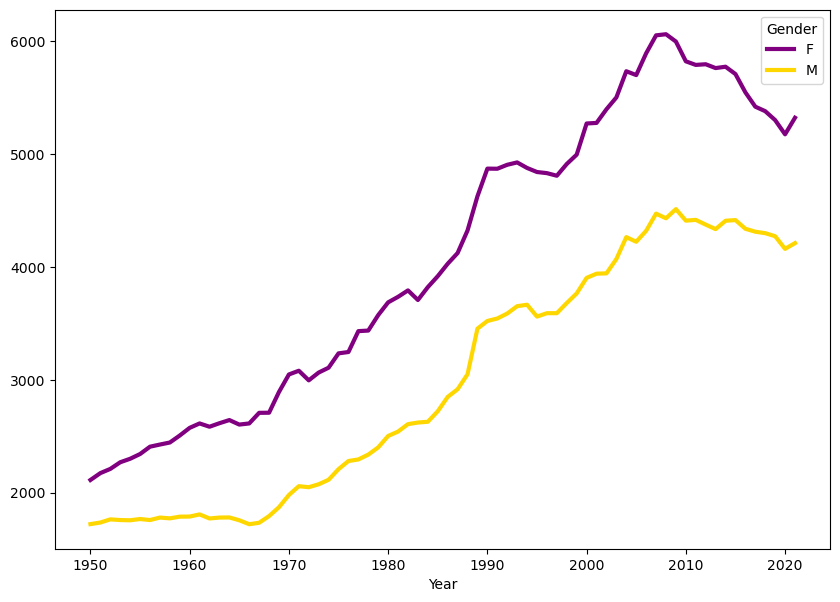

In [17]:
unique_names_per_gender.plot(figsize=(10,7), lw=3, color=['purple', 'gold'])

In [18]:
df = data.groupby(['Year', 'Gender']).agg({'Count':'sum'})/data['Count'].sum()
female_df = df[df['Gender']=='F']
male_df = df[df['Gender']=='M']
#line graph of female
#line graph of male
# .sum()['Count']
# df.reset_index(name='Count')
# .agg({'score': 'sum', 'num_attempts': 'sum'})

KeyError: 'Gender'

In [ ]:
# female_df.head(50)
female_df = df[df['Gender']=='F']

# SQL
select df.gender
from df
where df.gender == 'F'

In [ ]:
male_df

In [ ]:
#male 
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import array, log, pi
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.ticker as mticker
# ax.xaxis.set_minor_formatter(mticker.ScalarFormatter())
# ax.ticklabel_format(style='plain', axis='x')

In [ ]:
# male
year_male = male_df['Year'].tolist()
count_male = male_df['Count'].tolist()

year_female= female_df['Year'].tolist()
count_female = female_df['Count'].tolist()

plt.plot(year_male, count_male, color='red', label = 'Male')
plt.plot(year_female, count_female, color='blue', label='Female')
plt.legend()
plt.show()


In [ ]:
fig, ax = plt.subplots()
year_male = male_df['Year'].tolist()
count_male = male_df['Count'].tolist()

year_female= female_df['Year'].tolist()
count_female = female_df['Count'].tolist()

ax.plot(year_male, count_male, color='red')
ax.plot(year_female, count_female, color='blue')
ax.ticklabel_format(style='plain', axis='y')
plt.show()



In [ ]:
# female
year = female_df['Year'].tolist()
count = female_df['Count'].tolist()
plt.plot(year, count)
plt.show()

In [ ]:
# both
year = male_df['Year'].tolist()
count_male = male_df['Count'].tolist()
count_female = female_df['Count'].toList()
plt.plot(year, count_male, year, count_female)
plt.show()